In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

headers = ["Url", "Category","Position", "Title", "Location","Amount_Raised", "Goal", "Number_of_Donators",
           "Length_of_Fundraising", "FB_Shares", "GFM_hearts", "Text", "Latitude", "Longitude"]

df = pd.read_csv('GFM_data.csv', sep = '\t', encoding = 'latin1')


df

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73K,93 days 12:02:38.405126000,118K,72.5K,73.4K,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22.5K,205 days 12:02:39.366241000,71.7K,21.9K,22K,\r\nThe Navajo Nation COVID-19 Fund has been e...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19K,215 days 12:02:40.340314000,16.4K,18.3K,17.9K,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11.3K,131 days 12:02:41.464483000,21.3K,10.3K,10.4K,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24.7K,175 days 12:02:42.383091000,5.5K,24.3K,24.5K,My name is Melissa Green and I am the mother o...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,https://www.gofundme.com/f/Juneteenth-women-of...,Wishes,22,Juneteenth Women of Color Scholarship Fund,"Brooklyn, NY",17348.0,20000.0,368,160 days 12:20:27.031772000,214,366,366,The need for community and collective healing ...
882,0,https://www.gofundme.com/f/allterrain-wheelcha...,Wishes,22,All-Terrain Wheelchair for Benjamin Wimett,"Brandon, VT",19300.0,17000.0,309,200 days 12:20:28.768891000,2.5K,279,280,I am 35 years old and was born with cerebral p...
883,0,https://www.gofundme.com/f/Marthasdaughter,Wishes,23,Martha's Daughter,"Amherst, MA",21435.0,300000.0,324,110 days 12:20:30.168643000,868,318,318,"Greetings,My name is Nyanyika Banda. I am a ch..."
884,0,https://www.gofundme.com/f/x2s8dc-financial-di...,Wishes,23,Financial Difficulties,"Johnson City, TN",16405.0,70000.0,150,173 days 12:20:31.311577000,379,148,148,"\r\nMy wife, Roni, and I have faced many Â hea..."


<AxesSubplot:>

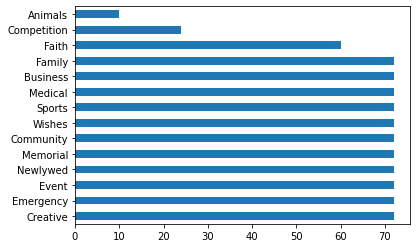

In [2]:
df['Category'].value_counts().plot(kind='barh')

In [3]:
#Duration clean
def helper_duration(y):
    if y[1] == 'days' or y[1] == 'day':
        y[0] = str(int(y[0])/30)
    elif y[1] == 'year' or y[1] == 'years':
        y[0] = str(int(y[0])*12)
    del y[1]
    return float(y[0])

df.groupby('Category').count()

,Unnamed: 0,Url,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
Category,,,,,,,,,,,,,
Animals,10,10,10,10,10,10,10,10,10,10,10,10,10
Business,72,72,72,72,72,67,67,67,67,67,67,67,70
Community,72,72,72,72,71,69,69,69,69,69,69,69,70
Competition,24,24,24,24,24,24,24,24,24,24,24,24,24
Creative,72,72,72,71,71,67,67,67,67,67,67,67,69
Emergency,72,72,72,72,72,64,64,64,64,64,64,64,68
Event,72,72,72,72,72,66,66,66,66,66,66,66,69
Faith,60,60,60,59,59,55,55,55,55,55,55,55,58
Family,72,72,72,71,71,69,69,69,69,69,69,69,70


,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text,Duration
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73K,93 days 12:02:38.405126000,118K,72.5K,73.4K,On August 23rd my son was shot multiple times ...,3.100000
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22.5K,205 days 12:02:39.366241000,71.7K,21.9K,22K,\r\nThe Navajo Nation COVID-19 Fund has been e...,6.833333
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19K,215 days 12:02:40.340314000,16.4K,18.3K,17.9K,"On Sunday, April 12, Sylvia Leroy, a pregnant ...",7.166667
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11.3K,131 days 12:02:41.464483000,21.3K,10.3K,10.4K,"First, thank you for being here. Tommy Rivers ...",4.366667
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24.7K,175 days 12:02:42.383091000,5.5K,24.3K,24.5K,My name is Melissa Green and I am the mother o...,5.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,https://www.gofundme.com/f/Juneteenth-women-of...,Wishes,22,Juneteenth Women of Color Scholarship Fund,"Brooklyn, NY",17348.0,20000.0,368,160 days 12:20:27.031772000,214,366,366,The need for community and collective healing ...,5.333333
882,0,https://www.gofundme.com/f/allterrain-wheelcha...,Wishes,22,All-Terrain Wheelchair for Benjamin Wimett,"Brandon, VT",19300.0,17000.0,309,200 days 12:20:28.768891000,2.5K,279,280,I am 35 years old and was born with cerebral p...,6.666667
883,0,https://www.gofundme.com/f/Marthasdaughter,Wishes,23,Martha's Daughter,"Amherst, MA",21435.0,300000.0,324,110 days 12:20:30.168643000,868,318,318,"Greetings,My name is Nyanyika Banda. I am a ch...",3.666667
884,0,https://www.gofundme.com/f/x2s8dc-financial-di...,Wishes,23,Financial Difficulties,"Johnson City, TN",16405.0,70000.0,150,173 days 12:20:31.311577000,379,148,148,"\r\nMy wife, Roni, and I have faced many Â hea...",5.766667


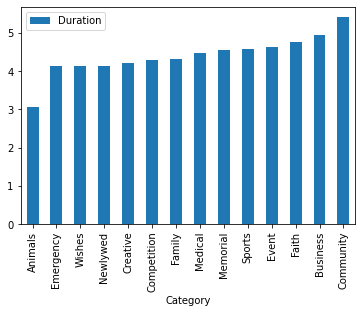

In [4]:
#Category v Duration 
d2 = df.assign(Duration = df.get('Length_of_Fundraising').str.split())
d2 = d2.dropna()
d2 = d2.assign(Duration= d2.get('Duration').apply(helper_duration))
d2.groupby('Category').mean().sort_values(by = 'Duration').plot(y = 'Duration', kind = 'bar')
d2

<AxesSubplot:xlabel='Duration', ylabel='Amount_Raised'>

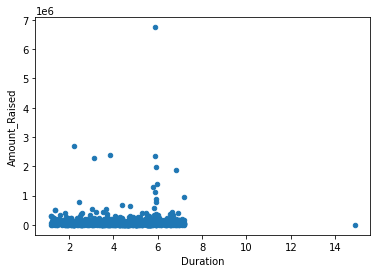

In [5]:
d2.plot.scatter(x = 'Duration', y = 'Amount_Raised')

In [6]:
#Shares/Likes Cleaner
def helper_likes(x):
    if 'K' in x:
        x = x.replace('K','')
        x = float(x)*1000
    else:
        x = float(x)
    return x

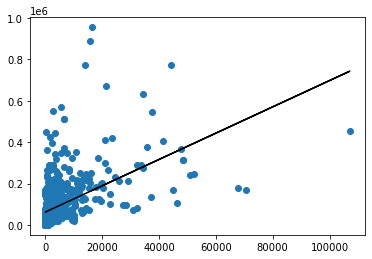

0.2549805985754676


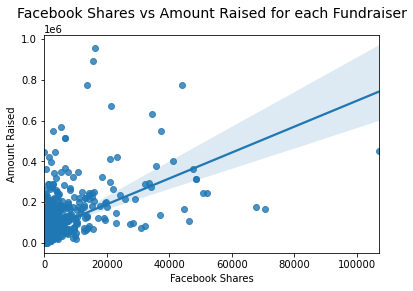

In [40]:
#FB shares v Amount Raised
d3 = df.dropna()
d3 = d3.assign(Fb = d3.get('FB_Shares').apply(helper_likes))
d3 = d3[d2.get('Amount_Raised') <= 1000000]
x = d3['Fb']
y = d3['Amount_Raised']
m, b = np.polyfit(x, y, 1)
fig, ax = plt.subplots()
ax.plot(x, m*x + b, color = "black")
ax.scatter(d3['Fb'], d3['Amount_Raised'])
plt.show()
ax = sns.regplot(x = d3['Fb'], y = d3['Amount_Raised'], scatter = True)
ax.set(xlabel='Facebook Shares', ylabel= 'Amount Raised')
plt.text(0.5, 1.08,'Facebook Shares vs Amount Raised for each Fundraiser',
         horizontalalignment='center',
         fontsize=14,
         transform = ax.transAxes)
print(r2_score(y, m*x + b))
#plt.title('Facebook Shares vs Amount Raised for each Fundraiser'))

In [ ]:
d4.groupby('Category').mean().sort_values(by = 'Number_of_Donations').plot(y = 'Number_of_Donations', kind = 'bar')

0.5878064678929811


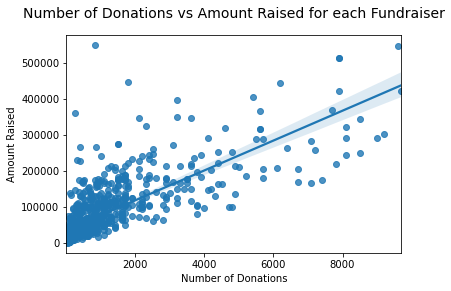

In [41]:
#Number of Donations v Amount Raised
d4 = df.dropna()
d4 = d4.assign(Number_of_Donations = d4.get('Number_of_Donations').apply(helper_likes))
d4_1 = d4[d4.get('Number_of_Donations') <=10000]
d4_2 = d4_1[d4_1.get('Amount_Raised')<= 600000]
#d4_2.plot.scatter(x = 'Number_of_Donations', y = 'Amount_Raised')
x = d4_2['Number_of_Donations']
y = d4_2['Amount_Raised']
m, b = np.polyfit(x, y, 1)
z = m*x + b
ci = 1.96 * np.std(z)/np.mean(z)
fig, ax = plt.subplots()
#ax.plot(x, m*x + b, color = "black")
#ax.fill_between(x, (m*x + b -ci), (m*x+ b +ci), color='b', alpha=.1)
#d4_2.plot.scatter(x, y)
ax = sns.regplot(x = d4_2['Number_of_Donations'], y = d4_2['Amount_Raised'], scatter = True)
ax.set(xlabel='Number of Donations', ylabel= 'Amount Raised')
plt.text(0.5, 1.08,'Number of Donations vs Amount Raised for each Fundraiser',
         horizontalalignment='center',
         fontsize=14,
         transform = ax.transAxes)
print(r2_score(y, m*x + b))

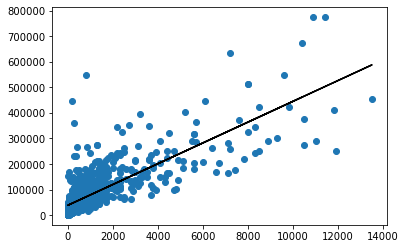

0.6208322621950042


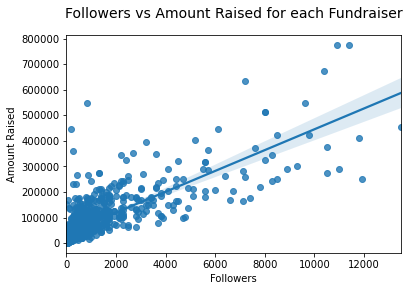

In [42]:
d11 = df.dropna()
d11 = d11.assign(Followers = d11.get('Followers').apply(helper_likes))
d11 = d11[d11.get('Amount_Raised') <= 1000000]
d11 = d11[d11.get('Followers') <= 15000]
x = d11['Followers']
y = d11['Amount_Raised']
m, b = np.polyfit(x, y, 1)
fig, ax = plt.subplots()
ax.plot(x, m*x + b, color = "black")
ax.scatter(d11['Followers'], d11['Amount_Raised'])
plt.show()
ax = sns.regplot(x = d11['Followers'], y = d11['Amount_Raised'], scatter = True)
ax.set(xlabel='Followers', ylabel= 'Amount Raised')
plt.text(0.5, 1.08,'Followers vs Amount Raised for each Fundraiser',
         horizontalalignment='center',
         fontsize=14,
         transform = ax.transAxes)
print(r2_score(y, m*x + b))

In [ ]:
d4.

Mean amounts by Category
Min amounts by Category
Max amounts by Category
Total Amounts by Category


<AxesSubplot:xlabel='Category'>

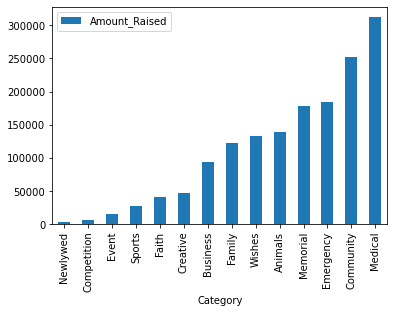

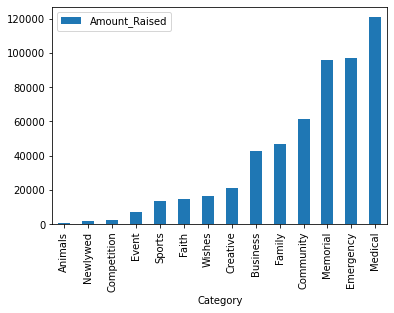

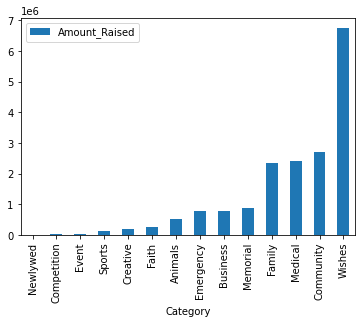

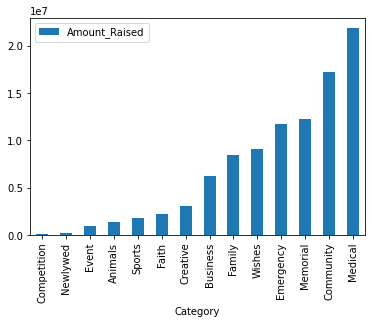

In [22]:
#Category v Amounts
d5 = df.dropna()
d6 = df.dropna()
d7 = df.dropna()
d8 = df.dropna()
d5 = d5.groupby(['Category']).mean().sort_values(by = 'Amount_Raised')
d6 = d6.groupby(['Category']).min().sort_values(by = 'Amount_Raised')
d7 = d7.groupby(['Category']).max().sort_values(by = 'Amount_Raised')
d8 = d8.groupby(['Category']).sum().sort_values(by = 'Amount_Raised')
print("Mean amounts by Category")
d5.plot(y = 'Amount_Raised', kind = 'bar') #Mean amounts
print("Min amounts by Category")
d6.plot(y = 'Amount_Raised', kind = 'bar') #Minimum Amounts
print("Max amounts by Category")
d7.plot(y = 'Amount_Raised', kind = 'bar') #Maximum Amounts
print("Total Amounts by Category")
d8.plot(y = 'Amount_Raised', kind = 'bar') #Total Amounts

In [34]:
# Donator and Goal Cleaner
def helper_Goal_Donator(x):
    if 'K' in x:
        x = x.replace('K', '')
        x = float(x)*1000
    elif 'M' in x:
        x = x.replace('M', '')
        x = float(x)*1000000
    elif ',' in x:
        x = x.replace(',','')
        x = float(x)
    else:
        x = float(x)
    return x


In [35]:
#Goal v Number of Donators
#Goal v Amount Raised
d9 = df.dropna()
d9 = d9.assign(Goals = d9.get('Goal').apply(helper_Goal_Donator))
d9 = d9.assign(Donators = d9.get('Number_of_Donators').apply(helper_Goal_Donator))
d9.plot.scatter(x = 'Goals', y = 'Donators')
d9.plot.scatter(x = 'Goals', y ='Amount_Raised')
#Zoomed in plot for Goals v Amount Raised
d9[(d9.get('Goals') <= 20000) & (d9.get('Amount_Raised') <= 100000)].plot.scatter(x = 'Goals', y ='Amount_Raised') 
#df7.plot.scatter(x = 'Goal_nums', y = 'gfm_nums', )

TypeError: argument of type 'float' is not iterable

In [ ]:
#Goals v GFM Hearts
d10 = df.assign(Goals = d9.get("Goals"), GFM = d4.get('Gfm'))
d10.plot.scatter(x = 'Goals', y = 'GFM')
#Goals v GFM Hearts zoomed in plot
d10[(d10.get('Goals') <= 500000) & (d10.get("GFM") <= 10000)].plot.scatter(x = 'Goals', y = "GFM")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

headers = ["Url", "Category","Position", "Title", "Location","Amount_Raised", "Goal", "Number_of_Donators",
           "Length_of_Fundraising", "FB_Shares", "GFM_hearts", "Text", "Latitude", "Longitude"]

df = pd.read_csv('GFM_data.csv', sep = '\t', encoding = 'latin1')


df

In [ ]:
df['Category'].value_counts().plot(kind='barh')

In [28]:
#Duration clean
def helper_duration(y):
    if y[1] == 'days' or y[1] == 'day':
        y[0] = str(int(y[0])/30)
    elif y[1] == 'year' or y[1] == 'years':
        y[0] = str(int(y[0])*12)
    del y[1]
    return float(y[0])



<AxesSubplot:xlabel='Category'>

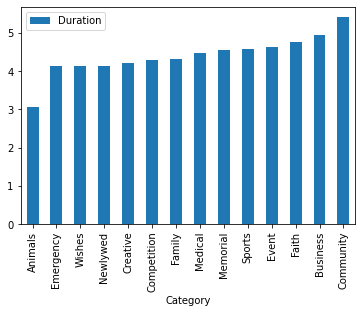

In [29]:
#Category v Duration 
d2 = df.assign(Duration = df.get('Length_of_Fundraising').str.split())
d2 = d2.dropna()
d2 = d2.assign(Duration= d2.get('Duration').apply(helper_duration))
d2.groupby('Category').mean().sort_values(by = 'Duration').plot(y = 'Duration', kind = 'bar')


In [ ]:
d2.plot.scatter(x = 'Duration', y = 'Amount_Raised')

In [ ]:
#Shares/Likes Cleaner
def helper_likes(x):
    if 'K' in x:
        x = x.replace('K','')
        x = float(x)*1000
    else:
        x = float(x)
    return x

<AxesSubplot:xlabel='Fb', ylabel='Amount_Raised'>

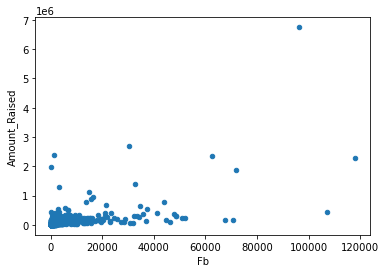

In [30]:
#FB shares v Amount Raised
d3 = df.dropna()
d3 = d3.assign(Fb = d3.get('FB_Shares').apply(helper_likes))
d3.plot.scatter(x = 'Fb', y = 'Amount_Raised')


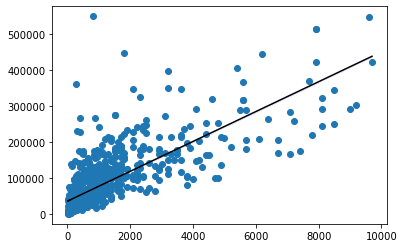

In [26]:
#GFM heart v Amount Raised

'''d4 = d4.assign(Gfm = d4.get('GFM_hearts').apply(helper_likes))

d4.plot.scatter(x = 'Gfm', y = 'Amount_Raised')
d4_2.plot.scatter(x = 'Gfm', y = 'Amount_Raised') #Zoomed in plot for GFM Hearts v Amount Raised
x = d4_2['Gfm']
y = d4_2['Amount_Raised']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)'''
d4 = df.dropna()
d4 = d4.assign(Number_of_Donations = d4.get('Number_of_Donations').apply(helper_likes))
d4_1 = d4[d4.get('Number_of_Donations') <=10000]
d4_2 = d4_1[d4_1.get('Amount_Raised')<= 600000]
#d4_2.plot.scatter(x = 'Number_of_Donations', y = 'Amount_Raised')
x = d4_2['Number_of_Donations']
y = d4_2['Amount_Raised']
m, b = np.polyfit(x, y, 1)
z = m*x + b
ci = 1.96 * np.std(z)/np.mean(z)
fig, ax = plt.subplots()
ax.plot(x, m*x + b, color = "black")
ax.fill_between(x, (m*x + b -ci), (m*x+ b +ci), color='blue', alpha=.1)
ax.scatter(x = d4_2['Number_of_Donations'], y = d4_2['Amount_Raised'])

Mean amounts by Category
Min amounts by Category
Max amounts by Category
Total Amounts by Category


<AxesSubplot:xlabel='Category'>

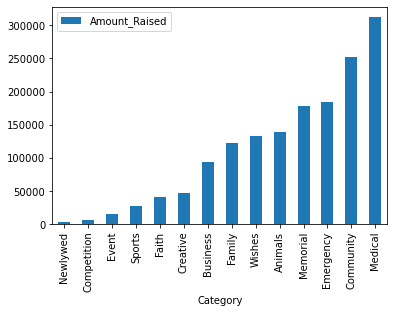

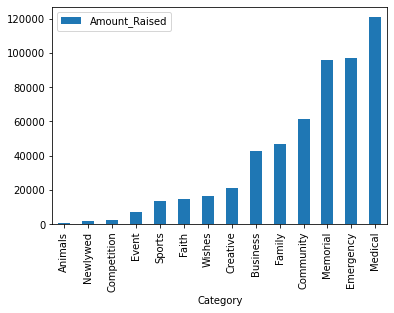

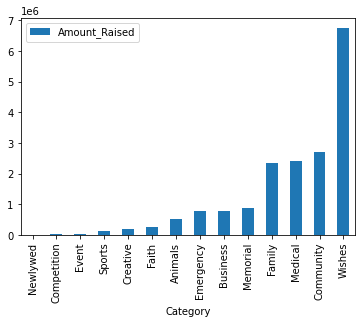

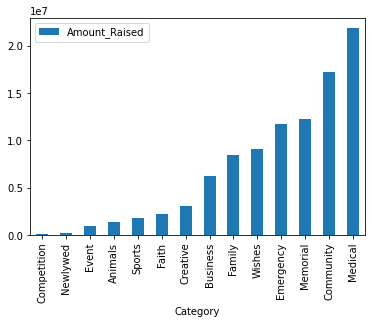

In [25]:
#Category v Amounts
d5 = df.dropna()
d6 = df.dropna()
d7 = df.dropna()
d8 = df.dropna()
d5 = d5.groupby(['Category']).mean().sort_values(by = 'Amount_Raised')
d6 = d6.groupby(['Category']).min().sort_values(by = 'Amount_Raised')
d7 = d7.groupby(['Category']).max().sort_values(by = 'Amount_Raised')
d8 = d8.groupby(['Category']).sum().sort_values(by = 'Amount_Raised')
print("Mean amounts by Category")
d5.plot(y = 'Amount_Raised', kind = 'bar') #Mean amounts
print("Min amounts by Category")
d6.plot(y = 'Amount_Raised', kind = 'bar') #Minimum Amounts
print("Max amounts by Category")
d7.plot(y = 'Amount_Raised', kind = 'bar') #Maximum Amounts
print("Total Amounts by Category")
d8.plot(y = 'Amount_Raised', kind = 'bar') #Total Amounts

In [32]:
# Donator and Goal Cleaner
def helper_Goal_Donator(x):
    if 'K' in x:
        x = x.replace('K', '')
        x = float(x)*1000
    elif 'M' in x:
        x = x.replace('M', '')
        x = float(x)*1000000
    elif ',' in x:
        x = x.replace(',','')
        x = float(x)
    else:
        x = float(x)
    return x


In [33]:
#Goal v Number of Donators
#Goal v Amount Raised
d9 = df.dropna()
d9 = d9.assign(Goals = d9.get('Goal').apply(helper_Goal_Donator))
d9 = d9.assign(Donators = d9.get('Number_of_Donators').apply(helper_Goal_Donator))
d9.plot.scatter(x = 'Goals', y = 'Donators')
d9.plot.scatter(x = 'Goals', y ='Amount_Raised')
#Zoomed in plot for Goals v Amount Raised
d9[(d9.get('Goals') <= 20000) & (d9.get('Amount_Raised') <= 100000)].plot.scatter(x = 'Goals', y ='Amount_Raised') 
#df7.plot.scatter(x = 'Goal_nums', y = 'gfm_nums', )

TypeError: argument of type 'float' is not iterable

In [23]:
#Goals v GFM Hearts
d10 = df.assign(Goals = d9.get("Goals"), GFM = d4.get('Gfm'))
d10.plot.scatter(x = 'Goals', y = 'GFM')
#Goals v GFM Hearts zoomed in plot
d10[(d10.get('Goals') <= 500000) & (d10.get("GFM") <= 10000)].plot.scatter(x = 'Goals', y = "GFM")

NameError: name 'd9' is not defined